In [11]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import tldextract
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras
keras.__version__
import pandas as pd
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from keras import models
from keras import layers
import kaggle

Using TensorFlow backend.


In [12]:
import requests
import os
import subprocess
import urllib.request
from bs4 import BeautifulSoup
import tldextract

In [13]:
doomdata = pd.read_html('https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/blob/main/doom_crossing_dataset.csv')[0]

In [14]:
animaldata = pd.read_html('https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/blob/main/animal_crossing_dataset.csv')[0]

In [15]:
animaldata = animaldata.drop(['Unnamed: 0'], axis=1)

In [5]:
animaldata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename
0,AnimalCrossing,g6ra3l,Elijah Wood visits a fan's island after seeing...,103447,0,0.96,7,1527,1.587664e+09,https://i.redd.it/yjrafuspulu41.png,yjrafuspulu41.png
1,AnimalCrossing,gp8bts,Amazing idea my girlfriend came up with,85186,0,0.93,16,1175,1.590253e+09,https://i.redd.it/2ehmq0fjpj051.jpg,2ehmq0fjpj051.jpg
2,AnimalCrossing,g8jju6,I just... really like Blathers,81436,0,0.95,28,903,1.587926e+09,https://i.redd.it/a2vvzng7g7v41.jpg,a2vvzng7g7v41.jpg
3,AnimalCrossing,gempba,I couldn't let my boy down. [OC],72708,0,0.96,24,522,1.588781e+09,https://i.redd.it/t88z1sn736x41.jpg,t88z1sn736x41.jpg
4,AnimalCrossing,fuv26r,My island is called Ravioli and I just finishe...,70357,0,0.96,9,563,1.586012e+09,https://i.redd.it/176wf6duetq41.jpg,176wf6duetq41.jpg


In [16]:
doomdata = doomdata.drop(['Unnamed: 0'], axis=1)

In [17]:
doomdata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename
0,Doom,gtli3b,And always remember,39007,0,0.94,1,531,1.590872e+09,https://i.redd.it/ksn72cinsy151.jpg,ksn72cinsy151.jpg
1,Doom,fnj4e5,Remember to have fun,30071,0,0.96,10,1158,1.584966e+09,https://i.redd.it/ik4d2mpi1fo41.jpg,ik4d2mpi1fo41.jpg
2,Doom,gemj1h,Can we please send our appreciacion to the lea...,27189,0,0.92,5,965,1.588780e+09,https://i.redd.it/y5pddy7h16x41.jpg,y5pddy7h16x41.jpg
3,Doom,fzhpqt,"This painting from this subreddit a year ago, ...",22948,0,0.97,1,296,1.586636e+09,https://i.redd.it/jrk0eogay8s41.jpg,jrk0eogay8s41.jpg
4,Doom,g4v23f,"Bethesda, you can still do the right thing her...",19896,0,0.96,34,956,1.587397e+09,https://i.redd.it/7c3lyx28tzt41.jpg,7c3lyx28tzt41.jpg


In [18]:
#test_folder='https://www.kaggle.com/andrewmvd/doom-crossing?select=animal_crossing'
import pathlib

ac_image_folder = '/CNN-Doom-Crossing-Dataset-master/animal_crossing/'
dm_image_folder = '/CNN-Doom-Crossing-Dataset-master/doom/'
dataset_url = "https://github.com/calebcaptain1/CNN-Doom-Crossing-Dataset/archive/master.zip"
if not os.path.exists(os.path.abspath('.') + ac_image_folder):
  image_zip = tf.keras.utils.get_file('CNN-Doom-Crossing-Dataset-master.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = dataset_url,
                                      extract = True)

  ac_PATH = os.path.dirname(image_zip) + ac_image_folder
  dm_PATH = os.path.dirname(image_zip) + dm_image_folder
  os.remove(image_zip)
  #image_zip = pathlib.Path(image_zip)
else:
  dm_PATH = os.path.dirname(image_zip) + dm_image_folder
  ac_PATH = os.path.dirname(image_zip) + ac_image_folder
  os.remove(image_zip)

146694144/Unknown - 59s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



442900480/Unknown - 94s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



474062848/Unknown - 97s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



514646016/Unknown - 102s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



545988608/Unknown - 106s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



609820672/Unknown - 113s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



641122304/Unknown - 117s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



786604032/Unknown - 134s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



838918144/Unknown - 140s 0us/step

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1044815872/Unknown - 164s 0us/step

In [19]:
print(ac_PATH)
print(dm_PATH)

C:\Users\caleb/CNN-Doom-Crossing-Dataset-master/animal_crossing/
C:\Users\caleb/CNN-Doom-Crossing-Dataset-master/doom/


In [20]:
import gc
gc.collect()

790

In [21]:
import cv2
import os

def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        enumerate(filename)
        if img is not None:
            images[filename] = img
            
    return images

In [22]:
ac_pics = load_images_from_folder(ac_PATH)
dm_pics = load_images_from_folder(dm_PATH)

In [23]:
import gc
gc.collect()

0

In [143]:
len(dm_pics)

840

In [24]:
x = animaldata['filename']
y = doomdata['filename']

In [25]:
title1 = dm_pics.keys()

In [26]:
result = [i for i in x if i in ac_pics]
result1 = [j for j in title1 if j in dm_pics]


In [19]:
len(result1)

840

In [27]:
titles = np.array(result)
titles1 = np.array(result1)

In [28]:
new = {}
for i in result:
    new[i] = ac_pics[i]
#print(new)

In [29]:
new1 = {}
for i in result1:
    new1[i] = dm_pics[i]
    
#print(new)

In [23]:
len(new1)

840

<function matplotlib.pyplot.show(*args, **kw)>

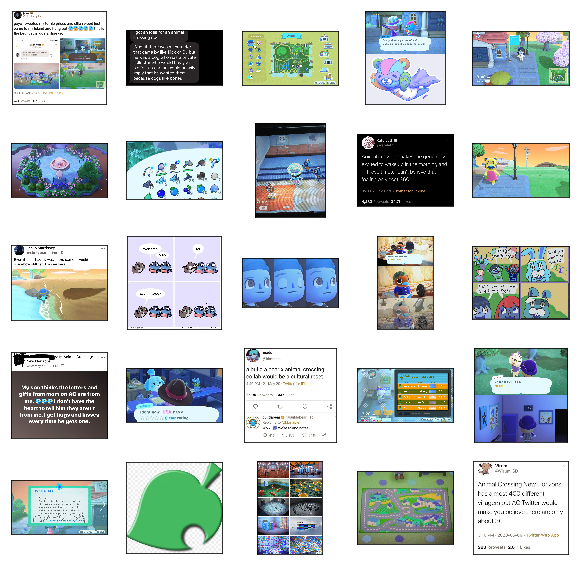

In [102]:
plt.figure(figsize=(10,10))
for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(new[titles[i]], cmap=plt.cm.binary)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

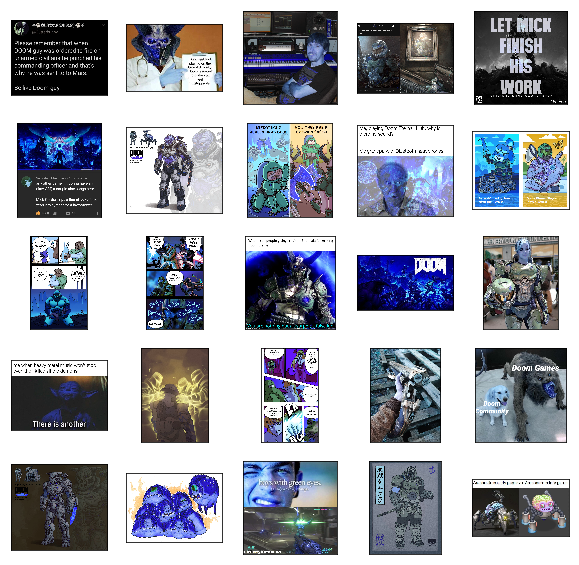

In [103]:
plt.figure(figsize=(10,10))
for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(new1[titles1[i]], cmap=plt.cm.binary)
plt.show

In [30]:
import gc
gc.collect()

0

In [31]:
labels =["AnimalCrossing", "Doom"]

In [26]:
animaldata.keys

<bound method NDFrame.keys of           subreddit      id  \
0    AnimalCrossing  g6ra3l   
1    AnimalCrossing  gp8bts   
2    AnimalCrossing  g8jju6   
3    AnimalCrossing  gempba   
4    AnimalCrossing  fuv26r   
..              ...     ...   
752  AnimalCrossing  g9674v   
753  AnimalCrossing  fnl57y   
754  AnimalCrossing  g7mis1   
755  AnimalCrossing  gtz9fa   
756  AnimalCrossing  fmjv7l   

                                                 title     ups  downs  \
0    Elijah Wood visits a fan's island after seeing...  103447      0   
1              Amazing idea my girlfriend came up with   85186      0   
2                       I just... really like Blathers   81436      0   
3                     I couldn't let my boy down. [OC]   72708      0   
4    My island is called Ravioli and I just finishe...   70357      0   
..                                                 ...     ...    ...   
752                         Sleepy, just like Blathers   11745      0   
753          

In [27]:
doomdata.keys

<bound method NDFrame.keys of     subreddit      id                                              title  \
0        Doom  gtli3b                                And always remember   
1        Doom  fnj4e5                               Remember to have fun   
2        Doom  gemj1h  Can we please send our appreciacion to the lea...   
3        Doom  fzhpqt  This painting from this subreddit a year ago, ...   
4        Doom  g4v23f  Bethesda, you can still do the right thing her...   
..        ...     ...                                                ...   
835      Doom  dirl12                               Thicc Flesh Consumed   
836      Doom  fvmlvj      DOOM Eternal has some top tier meme potential   
837      Doom  96ps5e                        He's back at it again folks   
838      Doom  d136d2               Caught this young slayer at SLC FanX   
839      Doom  b92vjw                               DOOM Posters by Gabz   

       ups  downs  upvote_ratio  total_awards_received  n

In [113]:
doomdata.tail()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename,images
835,Doom,dirl12,Thicc Flesh Consumed,2420,0,0.98,0,80,1.571243e+09,https://i.redd.it/1vinuy2dhxs31.png,1vinuy2dhxs31.png,0
836,Doom,fvmlvj,DOOM Eternal has some top tier meme potential,2413,0,0.99,0,50,1.586125e+09,https://i.redd.it/3jez3vw7q2r41.png,3jez3vw7q2r41.png,0
837,Doom,96ps5e,He's back at it again folks,2416,0,0.99,0,48,1.534087e+09,https://i.redd.it/lpibxuw4kof11.png,lpibxuw4kof11.png,0
838,Doom,d136d2,Caught this young slayer at SLC FanX,2409,0,0.99,0,116,1.567898e+09,https://i.redd.it/180mf4lt79l31.jpg,180mf4lt79l31.jpg,0
839,Doom,b92vjw,DOOM Posters by Gabz,2412,0,0.99,0,73,1.554322e+09,https://cdn.shopify.com/s/files/1/0558/2081/fi...,s,0


In [32]:
doomdata['images'] = 0
animaldata['images'] = 0

In [33]:
animaldata['images'] = new.values()

In [34]:
doomdata['images'] = new1.values()
#new1

SyntaxError: invalid syntax (<ipython-input-52-6e1949ac0576>, line 1)

In [34]:
doomdata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename,images
0,Doom,gtli3b,And always remember,39007,0,0.94,1,531,1.590872e+09,https://i.redd.it/ksn72cinsy151.jpg,ksn72cinsy151.jpg,"[[[68, 81, 97], [64, 77, 93], [59, 72, 88], [5..."
1,Doom,fnj4e5,Remember to have fun,30071,0,0.96,10,1158,1.584966e+09,https://i.redd.it/ik4d2mpi1fo41.jpg,ik4d2mpi1fo41.jpg,"[[[144, 127, 141], [148, 131, 145], [152, 135,..."
2,Doom,gemj1h,Can we please send our appreciacion to the lea...,27189,0,0.92,5,965,1.588780e+09,https://i.redd.it/y5pddy7h16x41.jpg,y5pddy7h16x41.jpg,"[[[72, 41, 70], [72, 42, 68], [72, 45, 64], [7..."
3,Doom,fzhpqt,"This painting from this subreddit a year ago, ...",22948,0,0.97,1,296,1.586636e+09,https://i.redd.it/jrk0eogay8s41.jpg,jrk0eogay8s41.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Doom,g4v23f,"Bethesda, you can still do the right thing her...",19896,0,0.96,34,956,1.587397e+09,https://i.redd.it/7c3lyx28tzt41.jpg,7c3lyx28tzt41.jpg,"[[[0, 0, 0], [224, 224, 224], [180, 180, 180],..."


In [35]:
animaldata.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename,images
0,AnimalCrossing,g6ra3l,Elijah Wood visits a fan's island after seeing...,103447,0,0.96,7,1527,1.587664e+09,https://i.redd.it/yjrafuspulu41.png,yjrafuspulu41.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,AnimalCrossing,gp8bts,Amazing idea my girlfriend came up with,85186,0,0.93,16,1175,1.590253e+09,https://i.redd.it/2ehmq0fjpj051.jpg,2ehmq0fjpj051.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,AnimalCrossing,g8jju6,I just... really like Blathers,81436,0,0.95,28,903,1.587926e+09,https://i.redd.it/a2vvzng7g7v41.jpg,a2vvzng7g7v41.jpg,"[[[193, 214, 121], [192, 213, 120], [190, 211,..."
3,AnimalCrossing,gempba,I couldn't let my boy down. [OC],72708,0,0.96,24,522,1.588781e+09,https://i.redd.it/t88z1sn736x41.jpg,t88z1sn736x41.jpg,"[[[75, 136, 102], [72, 132, 98], [70, 129, 98]..."
4,AnimalCrossing,fuv26r,My island is called Ravioli and I just finishe...,70357,0,0.96,9,563,1.586012e+09,https://i.redd.it/176wf6duetq41.jpg,176wf6duetq41.jpg,"[[[190, 213, 239], [190, 213, 239], [190, 213,..."


In [35]:
true_data = pd.concat([animaldata, doomdata], axis=0)

In [36]:
true_data.head()

,subreddit,id,title,ups,downs,upvote_ratio,total_awards_received,num_comments,created_utc,url,filename,images
0,AnimalCrossing,g6ra3l,Elijah Wood visits a fan's island after seeing...,103447,0,0.96,7,1527,1.587664e+09,https://i.redd.it/yjrafuspulu41.png,yjrafuspulu41.png,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,AnimalCrossing,gp8bts,Amazing idea my girlfriend came up with,85186,0,0.93,16,1175,1.590253e+09,https://i.redd.it/2ehmq0fjpj051.jpg,2ehmq0fjpj051.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,AnimalCrossing,g8jju6,I just... really like Blathers,81436,0,0.95,28,903,1.587926e+09,https://i.redd.it/a2vvzng7g7v41.jpg,a2vvzng7g7v41.jpg,"[[[193, 214, 121], [192, 213, 120], [190, 211,..."
3,AnimalCrossing,gempba,I couldn't let my boy down. [OC],72708,0,0.96,24,522,1.588781e+09,https://i.redd.it/t88z1sn736x41.jpg,t88z1sn736x41.jpg,"[[[75, 136, 102], [72, 132, 98], [70, 129, 98]..."
4,AnimalCrossing,fuv26r,My island is called Ravioli and I just finishe...,70357,0,0.96,9,563,1.586012e+09,https://i.redd.it/176wf6duetq41.jpg,176wf6duetq41.jpg,"[[[190, 213, 239], [190, 213, 239], [190, 213,..."


In [37]:
import gc
gc.collect()

0

In [2]:
sklearn.


SyntaxError: invalid syntax (<ipython-input-2-7417c81db343>, line 1)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
true_data.columns

Index(['subreddit', 'id', 'title', 'ups', 'downs', 'upvote_ratio',
       'total_awards_received', 'num_comments', 'created_utc', 'url',
       'filename', 'images'],
      dtype='object')

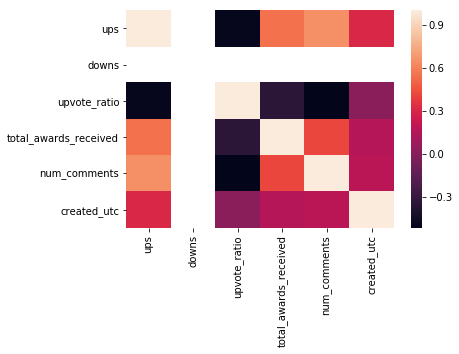

In [44]:
sns.heatmap(true_data.corr())

In [40]:
truestdataX = true_data[['filename', 'images']]
truestdataY = true_data['subreddit']

In [41]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [43]:
X_train, Y_train, X_test, Y_test = train_test_split(truestdataX, truestdataY, test_size=.3, random_state=42)

In [52]:
X_train.shape

(1117, 2)

In [51]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('x_train shape:', x_train.shape)
#print(x_train.shape[0], 'train samples')
#print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


model.fit(X_train, Y_train,
           batch_size=batch_size,
           epochs=epochs,
           validation_data=(X_test, Y_test),
           shuffle=True)
		   
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


ValueError: Input 0 is incompatible with layer conv2d_8: expected ndim=4, found ndim=2

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

Help on list object:

class list(object)
 |  list() -> new empty list
 |  list(iterable) -> new list initialized from iterable's items
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /